In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

In [13]:
df = pd.read_csv("C://Users/seolbluewings/Desktop/sample/train_1.csv")

In [14]:
df.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [15]:
df = df.T

In [16]:
df = df.reset_index()

In [18]:
col_header = df.iloc[0,:].values
df.columns = col_header

In [20]:
df = df.drop(0, axis = 0)

In [24]:
df = df.rename(columns = {'Page':'Date'})

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df = df.set_index('Date')

In [29]:
df.head(5)

,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
access_types = []
agents = []
for column in df.columns:
    access_type = column.split("_")[-2]
    agent = column.split("_")[-1]
    access_types.append(access_type)
    agents.append(agent)

In [31]:
from collections import Counter
access_dict = Counter(access_types)
access_dict

Counter({'all-access': 74315, 'desktop': 34809, 'mobile-web': 35939})

In [32]:
access_df = pd.DataFrame({"Access type" : access_dict.keys(),
                          "Number of columns" : access_dict.values()})
access_df

,Access type,Number of columns
0,all-access,74315
1,desktop,34809
2,mobile-web,35939


In [33]:
en_wikipedia_org_columns = [column for column in df.columns if "en.wikipedia.org" in column]

top_pages_en = df[en_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_en

Main_Page_en.wikipedia.org_all-access_all-agents         2.193851e+07
Main_Page_en.wikipedia.org_desktop_all-agents            1.595363e+07
Main_Page_en.wikipedia.org_mobile-web_all-agents         5.734518e+06
Special:Search_en.wikipedia.org_all-access_all-agents    2.371053e+06
Special:Search_en.wikipedia.org_desktop_all-agents       1.839723e+06
dtype: float64

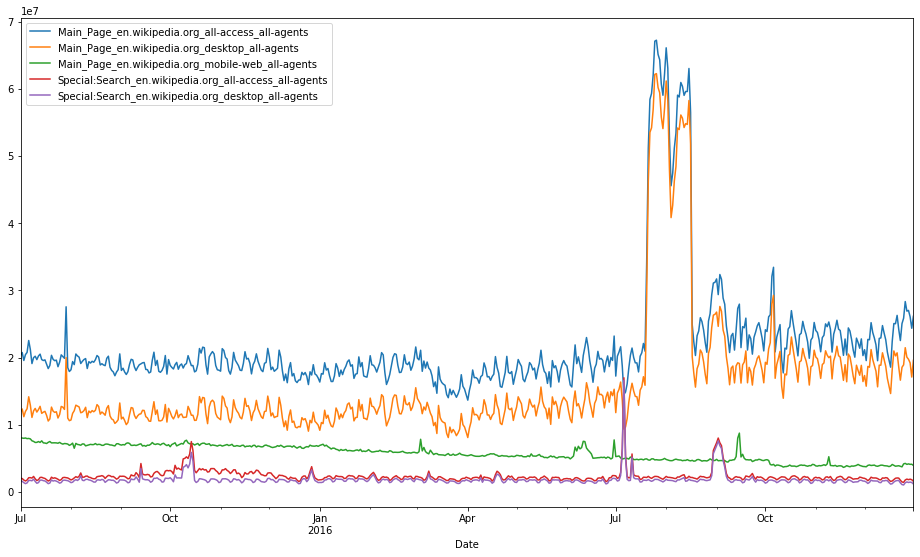

In [34]:
df[top_pages_en.index].plot(figsize = (16,9))